In [15]:
import pandas as pd

# 파일 경로 설정
file_21 = '/Users/hayden/Desktop/provincial council internship/2021년전체측정소자료.csv'
file_22 = '/Users/hayden/Desktop/provincial council internship/2022년전체측정소자료.csv'
file_23 = '/Users/hayden/Desktop/provincial council internship/2023년전체측정소자료.csv'

# 각각의 CSV 파일을 데이터프레임으로 읽기
df_21 = pd.read_csv(file_21)
df_22 = pd.read_csv(file_22)
df_23 = pd.read_csv(file_23)

# 데이터프레임을 리스트에 담기
dfs = [df_21, df_22, df_23]

# concat 함수를 사용하여 합치기
df = pd.concat(dfs, ignore_index=True)


In [16]:
df['STTN_NM'].unique()

array(['명서동', '용지동', '사파동', '성주동', '웅남동', '월영동', '봉암동', '회원동', '내서읍',
       '경화동', '상봉동', '대안동', '상대동', '정촌면', '무전동', '사천읍', '향촌동', '삼방동',
       '동상동', '장유동', '진영읍', '내일동', '고현동', '아주동', '물금읍', '북부동', '삼호동',
       '의령읍', '가야읍', '창녕읍', '고성읍', '남해읍', '하동읍', '금성면', '산청읍', '함양읍',
       '거창읍', '합천읍', '반송로', '김해대로', '이동차', '삼진로', '남상면', '대산면', '저구리',
       '마산항', '부산항', '진례면'], dtype=object)

In [17]:

# 거제 거창 김해 남해 밀양 양산 의령 진주 창원 통영 함양 합천 12개 
df.drop(columns=['NO', 'NOX'], inplace=True)
samjin = df[df['STTN_NM'].isin(['삼진로'])]

In [18]:
samjin

,MSR_DT,STTN_NM,PM25,PM10,O3,CO,SO2,NO2
690302,2022070516,삼진로,NaN,NaN,NaN,NaN,NaN,NaN
690303,2022070517,삼진로,NaN,NaN,NaN,NaN,NaN,NaN
690304,2022070518,삼진로,NaN,NaN,NaN,NaN,NaN,NaN
690305,2022070519,삼진로,NaN,NaN,NaN,NaN,NaN,NaN
690306,2022070520,삼진로,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1077110,2023123120,삼진로,8.0,14.0,0.038,0.50,0.0024,0.011
1077111,2023123121,삼진로,9.0,15.0,0.040,0.46,0.0024,0.009
1077112,2023123122,삼진로,11.0,14.0,0.040,0.47,0.0022,0.008
1077113,2023123123,삼진로,11.0,15.0,0.036,0.49,0.0023,0.010


In [19]:
bongam = df[df['STTN_NM'].isin(['봉암동'])]
bongam

,MSR_DT,STTN_NM,PM25,PM10,O3,CO,SO2,NO2
52560,2021010101,봉암동,4.0,9.0,0.022,0.30,0.002,0.010
52561,2021010102,봉암동,12.0,16.0,0.021,0.30,0.002,0.015
52562,2021010103,봉암동,10.0,13.0,0.020,0.40,0.002,0.013
52563,2021010104,봉암동,9.0,15.0,0.019,0.40,0.002,0.011
52564,2021010105,봉암동,10.0,12.0,0.021,0.30,0.002,0.010
...,...,...,...,...,...,...,...,...
785151,2023123120,봉암동,6.0,6.0,0.048,0.51,NaN,0.011
785152,2023123121,봉암동,6.0,8.0,0.043,0.49,NaN,0.013
785153,2023123122,봉암동,11.0,11.0,0.044,0.48,NaN,0.012
785154,2023123123,봉암동,10.0,7.0,0.040,0.51,NaN,0.013


In [20]:
# 각 컬럼의 NULL 값 개수 확인
nul_counts = bongam.isnull().sum()
# 결측치가 있는 열을 선형 보간으로 채우기
for col in df.columns:
    if bongam[col].dtype != 'datetime64[ns]':
        bongam[col] = bongam[col].interpolate(method='linear', limit_direction='both')

# 특정 컬럼의 NULL 값 개수 확인
PM25_null_count = bongam['PM25'].isnull().sum()
PM10_null_count = bongam['PM10'].isnull().sum()
O3_null_count = bongam['O3'].isnull().sum()
CO_null_count = bongam['CO'].isnull().sum()
SO2_null_count = bongam['SO2'].isnull().sum()
NO2_null_count = bongam['NO2'].isnull().sum()

print("PM25 컬럼의 NULL 값 개수:", PM25_null_count)
print("PM10 컬럼의 NULL 값 개수:", PM10_null_count)
print("O3 컬럼의 NULL 값 개수:", O3_null_count)
print("CO 컬럼의 NULL 값 개수:", CO_null_count)
print("SO2 컬럼의 NULL 값 개수:", SO2_null_count)
print("NO2 컬럼의 NULL 값 개수:", NO2_null_count)

# 전체 데이터프레임의 NULL 값 개수 확인
bongam_null_count = bongam.isnull().sum().sum()
print("전체 데이터프레임의 NULL 값 개수:", bongam_null_count)

PM25 컬럼의 NULL 값 개수: 0
PM10 컬럼의 NULL 값 개수: 0
O3 컬럼의 NULL 값 개수: 0
CO 컬럼의 NULL 값 개수: 0
SO2 컬럼의 NULL 값 개수: 0
NO2 컬럼의 NULL 값 개수: 0
전체 데이터프레임의 NULL 값 개수: 0


/var/folders/6k/r_smdd550yddqpmrhzs0gqyh0000gn/T/ipykernel_1938/1394279712.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bongam[col] = bongam[col].interpolate(method='linear', limit_direction='both')
/var/folders/6k/r_smdd550yddqpmrhzs0gqyh0000gn/T/ipykernel_1938/1394279712.py:6: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  bongam[col] = bongam[col].interpolate(method='linear', limit_direction='both')


In [21]:
bongam

,MSR_DT,STTN_NM,PM25,PM10,O3,CO,SO2,NO2
52560,2021010101,봉암동,4.0,9.0,0.022,0.30,0.0020,0.010
52561,2021010102,봉암동,12.0,16.0,0.021,0.30,0.0020,0.015
52562,2021010103,봉암동,10.0,13.0,0.020,0.40,0.0020,0.013
52563,2021010104,봉암동,9.0,15.0,0.019,0.40,0.0020,0.011
52564,2021010105,봉암동,10.0,12.0,0.021,0.30,0.0020,0.010
...,...,...,...,...,...,...,...,...
785151,2023123120,봉암동,6.0,6.0,0.048,0.51,0.0009,0.011
785152,2023123121,봉암동,6.0,8.0,0.043,0.49,0.0009,0.013
785153,2023123122,봉암동,11.0,11.0,0.044,0.48,0.0009,0.012
785154,2023123123,봉암동,10.0,7.0,0.040,0.51,0.0009,0.013


In [22]:
# 각 컬럼의 NULL 값 개수 확인
nul_counts = samjin.isnull().sum()
# 결측치가 있는 열을 선형 보간으로 채우기
for col in df.columns:
    if samjin[col].dtype != 'datetime64[ns]':
        samjin[col] = samjin[col].interpolate(method='linear', limit_direction='both')

# 특정 컬럼의 NULL 값 개수 확인
PM25_null_count = samjin['PM25'].isnull().sum()
PM10_null_count = samjin['PM10'].isnull().sum()
O3_null_count = samjin['O3'].isnull().sum()
CO_null_count = samjin['CO'].isnull().sum()
SO2_null_count = samjin['SO2'].isnull().sum()
NO2_null_count = samjin['NO2'].isnull().sum()

print("PM25 컬럼의 NULL 값 개수:", PM25_null_count)
print("PM10 컬럼의 NULL 값 개수:", PM10_null_count)
print("O3 컬럼의 NULL 값 개수:", O3_null_count)
print("CO 컬럼의 NULL 값 개수:", CO_null_count)
print("SO2 컬럼의 NULL 값 개수:", SO2_null_count)
print("NO2 컬럼의 NULL 값 개수:", NO2_null_count)

# 전체 데이터프레임의 NULL 값 개수 확인
samjin_null_count = samjin.isnull().sum().sum()
print("전체 데이터프레임의 NULL 값 개수:", samjin_null_count)

PM25 컬럼의 NULL 값 개수: 0
PM10 컬럼의 NULL 값 개수: 0
O3 컬럼의 NULL 값 개수: 0
CO 컬럼의 NULL 값 개수: 0
SO2 컬럼의 NULL 값 개수: 0
NO2 컬럼의 NULL 값 개수: 0
전체 데이터프레임의 NULL 값 개수: 0


/var/folders/6k/r_smdd550yddqpmrhzs0gqyh0000gn/T/ipykernel_1938/1269797119.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samjin[col] = samjin[col].interpolate(method='linear', limit_direction='both')
/var/folders/6k/r_smdd550yddqpmrhzs0gqyh0000gn/T/ipykernel_1938/1269797119.py:6: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  samjin[col] = samjin[col].interpolate(method='linear', limit_direction='both')


In [23]:
samjin

,MSR_DT,STTN_NM,PM25,PM10,O3,CO,SO2,NO2
690302,2022070516,삼진로,14.0,24.0,0.015,0.30,0.0010,0.010
690303,2022070517,삼진로,14.0,24.0,0.015,0.30,0.0010,0.010
690304,2022070518,삼진로,14.0,24.0,0.015,0.30,0.0010,0.010
690305,2022070519,삼진로,14.0,24.0,0.015,0.30,0.0010,0.010
690306,2022070520,삼진로,14.0,24.0,0.015,0.30,0.0010,0.010
...,...,...,...,...,...,...,...,...
1077110,2023123120,삼진로,8.0,14.0,0.038,0.50,0.0024,0.011
1077111,2023123121,삼진로,9.0,15.0,0.040,0.46,0.0024,0.009
1077112,2023123122,삼진로,11.0,14.0,0.040,0.47,0.0022,0.008
1077113,2023123123,삼진로,11.0,15.0,0.036,0.49,0.0023,0.010


In [42]:
import pandas as pd

# 예를 들어, 데이터프레임이 이미 있다고 가정
# bongam = pd.read_csv('your_file.csv')  # 데이터를 읽어오는 코드 (파일에서)

# 'MSR_DT' 열을 날짜와 시간으로 변환
bongam['MSR_DT'] = pd.to_datetime(bongam['MSR_DT'], format='%Y%m%d%H', errors='coerce')

# 특정 날짜 기준 설정
cutoff_date = pd.to_datetime('2022070516', format='%Y%m%d%H')

# 'MSR_DT' 열을 기준으로 필터링
filtered_bongam = bongam[bongam['MSR_DT'] >= cutoff_date]

# 결과 확인
print(filtered_bongam)


                    MSR_DT STTN_NM  PM25  PM10     O3    CO     SO2    NO2
405677 2022-07-05 16:00:00     봉암동  17.0  33.0  0.053  0.30  0.0050  0.030
405678 2022-07-05 17:00:00     봉암동  20.0  33.0  0.038  0.30  0.0060  0.034
405679 2022-07-05 18:00:00     봉암동  19.0  30.0  0.032  0.30  0.0060  0.031
405680 2022-07-05 19:00:00     봉암동  13.0  20.0  0.022  0.30  0.0040  0.023
405681 2022-07-05 20:00:00     봉암동  13.0  17.0  0.012  0.30  0.0040  0.030
...                    ...     ...   ...   ...    ...   ...     ...    ...
785150 2023-12-31 19:00:00     봉암동   6.0   6.0  0.049  0.51  0.0009  0.010
785151 2023-12-31 20:00:00     봉암동   6.0   6.0  0.048  0.51  0.0009  0.011
785152 2023-12-31 21:00:00     봉암동   6.0   8.0  0.043  0.49  0.0009  0.013
785153 2023-12-31 22:00:00     봉암동  11.0  11.0  0.044  0.48  0.0009  0.012
785154 2023-12-31 23:00:00     봉암동  10.0   7.0  0.040  0.51  0.0009  0.013

[12520 rows x 8 columns]


/var/folders/6k/r_smdd550yddqpmrhzs0gqyh0000gn/T/ipykernel_1938/3112671620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bongam['MSR_DT'] = pd.to_datetime(bongam['MSR_DT'], format='%Y%m%d%H', errors='coerce')


In [43]:
import pandas as pd

# 예를 들어, 데이터프레임이 이미 있다고 가정
# bongam = pd.read_csv('your_file.csv')  # 데이터를 읽어오는 코드 (파일에서)

# 'MSR_DT' 열을 날짜와 시간으로 변환
samjin['MSR_DT'] = pd.to_datetime(samjin['MSR_DT'], format='%Y%m%d%H', errors='coerce')

# 특정 날짜 기준 설정
cutoff_date = pd.to_datetime('2022070516', format='%Y%m%d%H')

# 'MSR_DT' 열을 기준으로 필터링
filtered_samjin = samjin[samjin['MSR_DT'] >= cutoff_date]

# 결과 확인
print(filtered_samjin)


                     MSR_DT STTN_NM  PM25  PM10     O3    CO     SO2    NO2
690302  2022-07-05 16:00:00     삼진로  14.0  24.0  0.015  0.30  0.0010  0.010
690303  2022-07-05 17:00:00     삼진로  14.0  24.0  0.015  0.30  0.0010  0.010
690304  2022-07-05 18:00:00     삼진로  14.0  24.0  0.015  0.30  0.0010  0.010
690305  2022-07-05 19:00:00     삼진로  14.0  24.0  0.015  0.30  0.0010  0.010
690306  2022-07-05 20:00:00     삼진로  14.0  24.0  0.015  0.30  0.0010  0.010
...                     ...     ...   ...   ...    ...   ...     ...    ...
1077109 2023-12-31 19:00:00     삼진로   6.0  11.0  0.037  0.54  0.0024  0.013
1077110 2023-12-31 20:00:00     삼진로   8.0  14.0  0.038  0.50  0.0024  0.011
1077111 2023-12-31 21:00:00     삼진로   9.0  15.0  0.040  0.46  0.0024  0.009
1077112 2023-12-31 22:00:00     삼진로  11.0  14.0  0.040  0.47  0.0022  0.008
1077113 2023-12-31 23:00:00     삼진로  11.0  15.0  0.036  0.49  0.0023  0.010

[12520 rows x 8 columns]


/var/folders/6k/r_smdd550yddqpmrhzs0gqyh0000gn/T/ipykernel_1938/744638403.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samjin['MSR_DT'] = pd.to_datetime(samjin['MSR_DT'], format='%Y%m%d%H', errors='coerce')


In [45]:
filtered_samjin.describe()

,MSR_DT,PM25,PM10,O3,CO,SO2,NO2,hour
count,12520,12520.000000,12520.000000,12520.000000,12520.000000,12520.000000,12520.000000,12520.000000
mean,2023-04-03 19:49:33.162939136,14.148588,28.045768,0.029055,0.427242,0.002088,0.013046,12.004792
min,2022-07-05 16:00:00,0.000000,0.000000,0.000000,0.200000,0.001000,0.002000,1.000000
25%,2022-11-18 17:45:00,9.000000,18.000000,0.015000,0.300000,0.001500,0.009000,6.000000
50%,2023-04-03 19:30:00,14.000000,24.000000,0.026000,0.400000,0.002000,0.010000,12.000000
75%,2023-08-17 21:15:00,17.000000,31.000000,0.039000,0.500000,0.003000,0.015000,18.000000
max,2023-12-31 23:00:00,60.000000,374.000000,0.104000,1.200000,0.010700,0.059000,23.000000
std,NaN,7.424608,21.656085,0.017368,0.126592,0.000848,0.007165,6.634356


In [46]:
filtered_bongam.describe()

,MSR_DT,PM25,PM10,O3,CO,SO2,NO2,hour
count,12520,12520.000000,12520.000000,12520.000000,12520.000000,12520.000000,12520.000000,12520.000000
mean,2023-04-03 19:49:33.162939136,16.198353,28.091688,0.031565,0.360488,0.003314,0.017407,12.004792
min,2022-07-05 16:00:00,0.000000,0.000000,0.000000,0.100000,0.000700,0.003000,1.000000
25%,2022-11-18 17:45:00,8.000000,15.000000,0.019000,0.290000,0.002977,0.010000,6.000000
50%,2023-04-03 19:30:00,13.000000,23.000000,0.030000,0.330000,0.003000,0.015000,12.000000
75%,2023-08-17 21:15:00,21.000000,33.000000,0.041000,0.400000,0.004000,0.022000,18.000000
max,2023-12-31 23:00:00,107.000000,509.000000,0.111000,2.300000,0.037500,0.094000,23.000000
std,NaN,11.300906,24.393159,0.016814,0.120644,0.001137,0.009692,6.634356


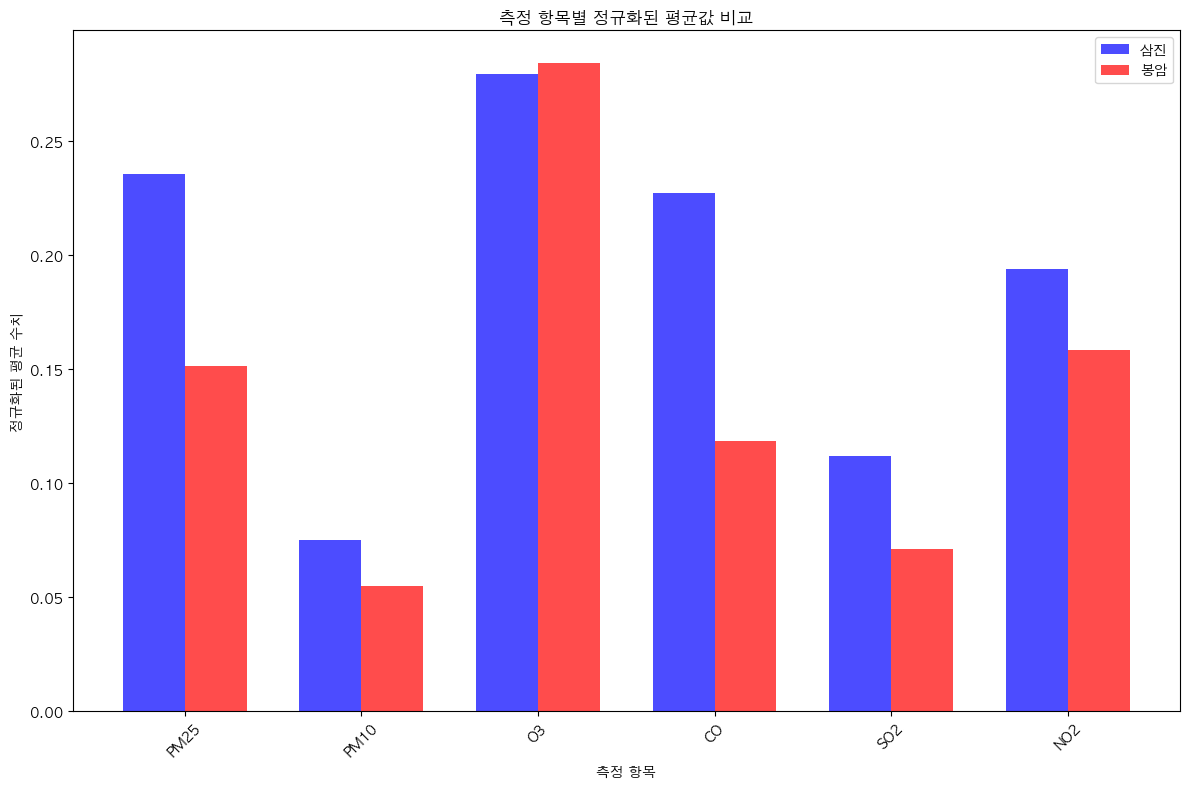

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Matplotlib에서 한글이 표시될 수 있도록 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호가 깨지지 않도록 설정

# 데이터 예시 (이 부분은 실제 데이터 파일을 읽는 코드로 대체하세요)
# filtered_samjin = pd.read_csv('filtered_samjin.csv')
# filtered_bongam = pd.read_csv('filtered_bongam.csv')

# 정규화를 위한 스케일러 생성
scaler = MinMaxScaler()

# PM25, PM10, O3, CO, SO2, NO2 열을 정규화
samjin_scaled_values = scaler.fit_transform(filtered_samjin[['PM25', 'PM10', 'O3', 'CO', 'SO2', 'NO2']])
bongam_scaled_values = scaler.fit_transform(filtered_bongam[['PM25', 'PM10', 'O3', 'CO', 'SO2', 'NO2']])

# 정규화된 데이터 프레임 생성
samjin_scaled = pd.DataFrame(samjin_scaled_values, columns=['PM25', 'PM10', 'O3', 'CO', 'SO2', 'NO2'])
bongam_scaled = pd.DataFrame(bongam_scaled_values, columns=['PM25', 'PM10', 'O3', 'CO', 'SO2', 'NO2'])

# 정규화된 데이터의 평균값 계산
samjin_means = samjin_scaled.mean()
bongam_means = bongam_scaled.mean()

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 8))

# 두 데이터셋의 정규화된 평균값을 막대 그래프로 표시
bar_width = 0.35
index = range(len(samjin_means))

# 막대 그래프 생성
bar1 = ax.bar(index, samjin_means, bar_width, label='삼진', alpha=0.7, color='b')
bar2 = ax.bar([i + bar_width for i in index], bongam_means, bar_width, label='봉암', alpha=0.7, color='r')

# 레이블과 타이틀 설정
ax.set_xlabel('측정 항목')
ax.set_ylabel('정규화된 평균 수치')
ax.set_title('측정 항목별 정규화된 평균값 비교')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(samjin_means.index, rotation=45)
ax.legend()

# 그래프 표시
plt.tight_layout()
plt.show()
